NOTE: This problem is a more challenging version of <a href="problem=81">Problem 81</a>.

The minimal path sum in the $5$ by $5$ matrix below, by starting in any cell in the left column and finishing in any cell in the right column, and only moving up, down, and right, is indicated in red and bold; the sum is equal to $994$.

$$
\begin{pmatrix}
131 & 673 & \color{red}{234} & \color{red}{103} & \color{red}{18}\\
\color{red}{201} & \color{red}{96} & \color{red}{342} & 965 & 150\\
630 & 803 & 746 & 422 & 111\\
537 & 699 & 497 & 121 & 956\\
805 & 732 & 524 & 37 & 331
\end{pmatrix}
$$
Find the minimal path sum from the left column to the right column in <a href="resources/documents/0082_matrix.txt">matrix.txt</a> (right click and "Save Link/Target As..."), a 31K text file containing an $80$ by $80$ matrix.

# starting matrix setup
#### this is just putting the cv file into a matrix
---

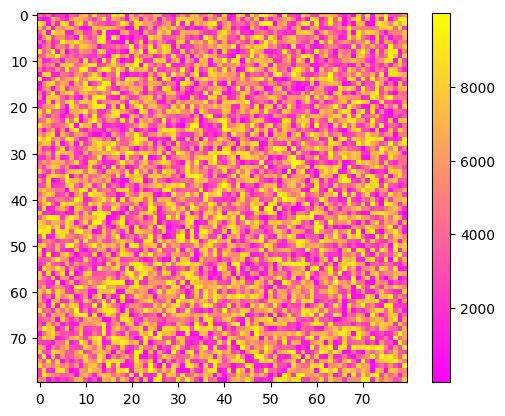

In [1]:
import matplotlib.pyplot as plt

Map = open("src/matrix.cv","r")
MapString = Map.read()


Matrix=[]

for i in MapString.split("\n"):
   Matrix.append(i.split(","))

for x in range(len(Matrix)):
   for y in range(len(Matrix[x])):
      Matrix[x][y] = int(Matrix[x][y])

plt.imshow(Matrix,cmap ="spring")
plt.colorbar()